# Image classifiaction using keras (basics) MNIST dataset

 MNIST  dataset is dataset  of handwritten images has served as the basis for benchmarking classification algorithms. It contains **60,000 images** in the training set and **10,000 images** in the test set.
 
 The images are matrices of size 28×28.So, we reshape the image matrix to an array of size 784 ( 28*28 ) and feed this array to the network.We will use a network with 2 hidden layers having 512 neurons each. The output layer will have 10 layers for the 10 digits.

<img src='img/mnistnn.png' >

# Keras Workflow

<img src='img/keras-workflow.png'>

# Load the data 

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import tensorflow as tf

 keras has a function ***mnist.load_data()*** which downloads the data from its servers if it is not present on your computer. The data loaded using this function is divided into training and test sets

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Checking the shape of data

The data consists of handwritten numbers ranging from 0 to 9.It has 60,000 train samples and 10,000 test samples. Each sample is a 28×28 grayscale image.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape


(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
# Find the unique numbers from the train labels
#import numpy first
import numpy  as np
classes = np.unique(train_labels)

In [9]:
nClasses = len(classes)

In [10]:
print('total no of classes:',nClasses)
print('classes:',classes)

total no of classes: 10
classes: [0 1 2 3 4 5 6 7 8 9]


The above shows  there are 10 type of different types of images present 

Now lets see sample training data 

In [11]:
#import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
plt.figure(figsize=[10,5])
#figsize[height,width]

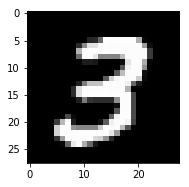

In [13]:
#Display a traning image 
plt.subplot(121)
#subplot(Add a subplot to the current figure)
plt.imshow(train_images[7,:,:], cmap='gray')
#imshow display an image in 2-d[any image no can be taken]



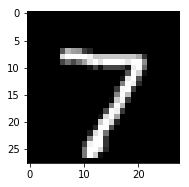

In [14]:
# display a testing image
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')

# Processing the data

The images are grayscale and the pixel values range from 0 to 255

1.Convert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [15]:
#changing dimension of 28*28 dimension image into an array of 784 
dimdata=np.prod(train_images.shape[1:])
#takes only images column and products the sizes of image
train_data = train_images.reshape(train_images.shape[0], dimdata)
test_data = test_images.reshape(test_images.shape[0], dimdata)

2.Convert data to float and scale value between 0 and 1

In [16]:
#change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [17]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

3.Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.
For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [18]:
#import to_categorial for one hot encoding
from keras.utils import to_categorical
train_labels_one_hot=to_categorical(train_labels)
test_labels_one_hot=to_categorical(test_labels)

In [19]:
#change in label display
print('Original label 0 : ', train_labels[6])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  1
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Create the Network

We will use the Sequential model for building the network. In the Sequential model, we can just stack up layers by adding the desired layer one by one. We use the Dense layer, also called fully connected layer since we are building a feedforward network in which all the neurons from one layer are connected to the neurons in the previous layer. Apart from the Dense layer, we add the ReLU activation function which is required to introduce non-linearity to the model. This will help the network learn non-linear decision boundaries. The last layer is a softmax layer as it is a multiclass classification problem. For binary classification, we can use sigmoid.

In [20]:
#import sequencial and dense
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimdata,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(nClasses,activation='softmax'))

W0627 16:57:57.245867 139728881518400 deprecation_wrapper.py:119] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 16:57:57.511577 139728881518400 deprecation_wrapper.py:119] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 16:57:57.549947 139728881518400 deprecation_wrapper.py:119] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



# Configure the network

Configuring the network means:
        1.Specify an Optimizer which determines how the network weights are updated.
        2.Specify the type of cost function or loss function.
        3.Specify the metrics you want to evaluate during training and testing.
        4.Create the model graph using the backend.
        5.Any other advanced configuration.
 
 This is done in Keras using the **model.compile() function**.
1. Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
2. Optimizer —This is how the model is updated based on the data it sees and its loss function.
3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0627 16:57:57.603131 139728881518400 deprecation_wrapper.py:119] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 16:57:57.686108 139728881518400 deprecation_wrapper.py:119] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Training the model

In [23]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

W0627 16:57:58.072469 139728881518400 deprecation.py:323] From /home/aakanksha/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0627 16:57:58.154976 139728881518400 deprecation_wrapper.py:119] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2667 - acc: 0.9179 - val_loss: 0.1604 - val_acc: 0.9490
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0905 - acc: 0.9722 - val_loss: 0.1341 - val_acc: 0.9595
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0588 - acc: 0.9818 - val_loss: 0.0975 - val_acc: 0.9704
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0397 - acc: 0.9872 - val_loss: 0.0938 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0803 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0229 - acc: 0.9924 - val_loss: 0.0659 - val_acc: 0.9827
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0168 - acc: 0.9949 - val_loss: 0.0868 - val_acc

# Evaluate the data

In [24]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 56us/step


In [25]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Evaluation result on Test Data : Loss = 0.11043014621197303, accuracy = 0.9839


# Check for accuracy

Text(0.5,1,'Loss Curves')

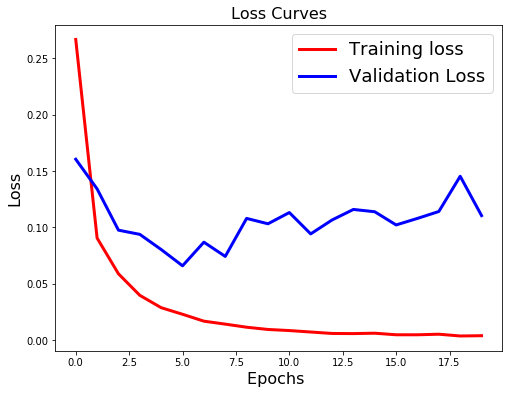

In [26]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

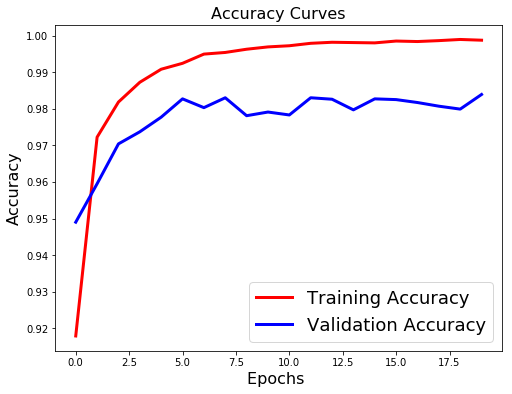

In [27]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


Although the accuracy obtained above is very good, if you see the loss and accuracy curves in the above figures, you’ll notice that the validation loss initially decrease, but then it starts increasing gradually. Also, there is a substantial difference between the training and test accuracy. This is a clear sign of Overfitting which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data. Thus, the difference in the training and test accuracy.

# Add Regularization to model

Overfitting occurs mainly because the network parameters are getting too biased towards the training data. We can add a dropout layer to overcome this problem to a certain extent. In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.

In [28]:
from keras.layers import Dropout

In [29]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimdata,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

W0627 16:58:55.289070 139728881518400 deprecation.py:506] From /home/aakanksha/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Check performance after regularization

In [30]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3757 - acc: 0.8834 - val_loss: 0.1460 - val_acc: 0.9554
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1692 - acc: 0.9490 - val_loss: 0.1045 - val_acc: 0.9675
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1296 - acc: 0.9616 - val_loss: 0.0791 - val_acc: 0.9742
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1097 - acc: 0.9669 - val_loss: 0.0805 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0974 - acc: 0.9706 - val_loss: 0.0876 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0887 - acc: 0.9731 - val_loss: 0.0717 - val_acc: 0.9797
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0826 - acc: 0.9756 - val_loss: 0.0678 - val_acc

10000/10000 [==============================] - 1s 55us/step
Evaluation result on Test Data : Loss = 0.11043014621197303, accuracy = 0.9839


Text(0.5,1,'Accuracy Curves')

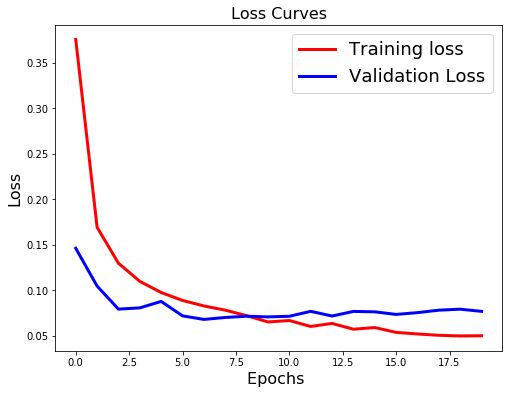

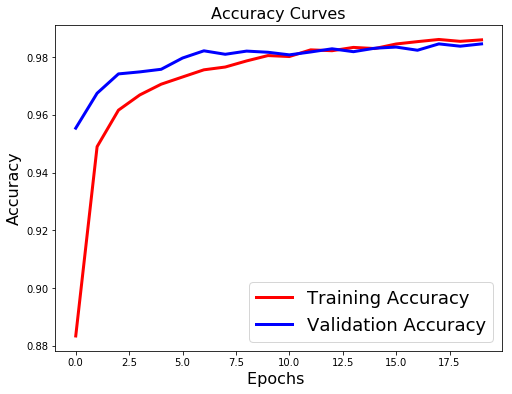

In [32]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Getting the predicted class

In [33]:
model_reg.predict_classes(test_data[[0],:])

array([7])

# Getting the probability

In [37]:
model_reg.predict(test_data[[0],:])